# Calculating $\pi$ using Viète's formula

In mathematics, Viète's formula is the following infinite product of nested radicals representing twice the reciprocal of the mathematical constant $\pi$:

${\displaystyle {\frac {2}{\pi }}={\frac {\sqrt {2}}{2}}\cdot {\frac {\sqrt {2+{\sqrt {2}}}}{2}}\cdot {\frac {\sqrt {2+{\sqrt {2+{\sqrt {2}}}}}}{2}}\cdots }$

It can also be represented as:

${\displaystyle {\frac {2}{\pi }}=\prod _{n=1}^{\infty }\cos {\frac {\pi }{2^{n+1}}}}$

The formula is named after François Viète, who published it in 1593.

References: https://en.wikipedia.org/wiki/Vi%C3%A8te%27s_formula

In [1]:
from decimal import Decimal, getcontext

ctx= getcontext()
digits = 5000
ctx.prec=digits

Viète's formula may be rewritten and understood as a limit expression:

${\displaystyle \lim _{n\rightarrow \infty }\prod _{i=1}^{n}{\frac {a_{i}}{2}}={\frac {2}{\pi }}}$
where

${\displaystyle {\begin{aligned}a_{1}&={\sqrt {2}}\\a_{n}&={\sqrt {2+a_{n-1}}}\end{aligned}}}$
and 

${\displaystyle {\begin{aligned}p_{n}&=\frac{2}{\sqrt{2}}.\frac{2}{\sqrt {2+\sqrt{2}}}.\frac{2}{\sqrt {2+\sqrt{2+\sqrt{2}}}} \cdots \approx \frac{\pi}{2} \\
p_{n}&=\frac{2}{a_1}.\frac{2}{a_2}.\frac{2}{a_3} \cdots \approx \frac{\pi}{2}\end{aligned}}}$

In [2]:
def vieta_formula(n, k):
    m = n+k
    a_n = 0
    p=1
    # fill V[0,n] for n to n+k
    for i in range(1, m+1):
        a_n = ctx.sqrt(2 + a_n)
        p *= Decimal(2/a_n)
        if i>=n:
            V.append(p)
    pi = V[-1]*2
    return pi

In [3]:
n=27
k=100
V=[]
pi1 = vieta_formula(n,k)

---
## Kreminski's Accelerated Convergence of Viète's Formula

This infinite product formula, while elegant, is a poor choice for computing the decimal digits of π because it converges so slowly.  
You may have observed that each Viète iteration requires a square root operation.  Square root operations are computationally very expensive making Viète's Formula computationally uninteresting.

An article by Rick Kreminski, offers a recursion that accelerates the convergence of Viète's Formula. Viète became computationally interesting.

${\displaystyle {\begin{aligned}V_{(k,n)}&=\frac{4^{k}V_{(k-1, n+1)} - V_{(k-1, n)}}{4^k-1} \\V_{(0,n)}&=p_n \end{aligned}}}$

Let $p_n$ denote the partial product of the first n terms in (Vieta), and let $V_{(k,n)} $ be the accelerations.

Reference: R. Kreminski, Pi to Thousands of Digits from Vieta's Formula, Mathematics Magazine, Vol. 81, No. 3, June 2008, 201-207 - https://www.jstor.org/stable/27643107

In [4]:
def vieta_accelerated(k):
    kpow = 1
    n = k
    for j in range(k):
        kpow *= 4
        for i in range(n):
            V[i] = Decimal((Decimal(kpow * V[i+1]) - V[i]) / (kpow-1))
        n-=1
    return Decimal(2*V[0])

In [5]:
pi2 = vieta_accelerated(k)
#print(pi2)

---
## Compare with accurate values of pi :


Reference: "[50,000 digits of $\pi$.](https://vhernando.github.io/pi-digits-500000-calculate)"

In [6]:
# accurate upto 50k decimal places
#a='3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679821480865132823066470938446095505822317253594081284811174502841027019385211055596446229489549303819644288109756659334461284756482337867831652712019091456485669234603486104543266482133936072602491412737245870066063155881748815209209628292540917153643678925903600113305305488204665213841469519415116094330572703657595919530921861173819326117931051185480744623799627495673518857527248912279381830119491298336733624406566430860213949463952247371907021798609437027705392171762931767523846748184676694051320005681271452635608277857713427577896091736371787214684409012249534301465495853710507922796892589235420199561121290219608640344181598136297747713099605187072113499999983729780499510597317328160963185950244594553469083026425223082533446850352619311881710100031378387528865875332083814206171776691473035982534904287554687311595628638823537875937519577818577805321712268066130019278766111959092164201989380952572010654858632788659361533818279682303019520353018529689957736225994138912497217752834791315155748572424541506959508295331168617278558890750983817546374649393192550604009277016711390098488240128583616035637076601047101819429555961989467678374494482553797747268471040475346462080466842590694912933136770289891521047521620569660240580381501935112533824300355876402474964732639141992726042699227967823547816360093417216412199245863150302861829745557067498385054945885869269956909272107975093029553211653449872027559602364806654991198818347977535663698074265425278625518184175746728909777727938000816470600161452491921732172147723501414419735685481613611573525521334757418494684385233239073941433345477624168625189835694855620992192221842725502542568876717904946016534668049886272327917860857843838279679766814541009538837863609506800642251252051173929848960841284886269456042419652850222106611863067442786220391949450471237137869609563643719172874677646575739624138908658326459958133904780275900994657640789512694683983525957098258226205224894077267194782684826014769909026401363944374553050682034962524517493996514314298091906592509372216964615157098583874105978859597729754989301617539284681382686838689427741559918559252459539594310499725246808459872736446958486538367362226260991246080512438843904512441365497627807977156914359977001296160894416948685558484063534220722258284886481584560285060168427394522674676788952521385225499546667278239864565961163548862305774564980355936345681743241125150760694794510965960940252288797108931456691368672287489405601015033086179286809208747609178249385890097149096759852613655497818931297848216829989487226588048575640142704775551323796414515237462343645428584447952658678210511413547357395231134271661021359695362314429524849371871101457654035902799344037420073105785390621983874478084784896833214457138687519435064302184531910484810053706146806749192781911979399520614196634287544406437451237181921799983910159195618146751426912397489409071864942319615679452080951465502252316038819301420937621378559566389377870830390697920773467221825625996615014215030680384477345492026054146659252014974428507325186660021324340881907104863317346496514539057962685610055081066587969981635747363840525714591028970641401109712062804390397595156771577004203378699360072305587631763594218731251471205329281918261861258673215791984148488291644706095752706957220917567116722910981690915280173506712748583222871835209353965725121083579151369882091444210067510334671103141267111369908658516398315019701651511685171437657618351556508849099898599823873455283316355076479185358932261854896321329330898570642046752590709154814165498594616371802709819943099244889575712828905923233260972997120844335732654893823911932597463667305836041428138830320382490375898524374417029132765618093773444030707469211201913020330380197621101100449293215160842444859637669838952286847831235526582131449576857262433441893039686426243410773226978028073189154411010446823252716201052652272111660396665573092547110557853763466820653109896526918620564769312570586356620185581007293606598764861179104533488503461136576867532494416680396265797877185560845529654126654085306143444318586769751456614068007002378776591344017127494704205622305389945613140711270004078547332699390814546646458807972708266830634328587856983052358089330'

def getPi(digits=2000):
    from urllib.request import urlopen
    url = 'https://vhernando.github.io/pi-digits-500000-calculate'
    page = urlopen(url)
    html_bytes = page.read()
    html = html_bytes.decode("utf-8")
    
    sp = html.find('3.14')   # starting point of pi
    
    # ending point of pi
    #ep = html.find('24<br>')
    
    return html[sp:sp+digits]

In [7]:
def compare(approx_pi, digits=2000):
    org_pi = getPi(digits)
    approx_pi = str(approx_pi)
    count=0
    i=0
    try:
        while(i<=digits):
            if org_pi[i] != approx_pi[i]:
                break
            count+=1
            i+=1
    except:
        print('Error at: ',i)
    return count

In [8]:
print("Accuracy of pi calculated using Vieta's formula: ", compare(pi1, digits))
print("Accuracy of pi calculated using Accelerated Vieta's formula: ", compare(pi2, digits))

Accuracy of pi calculated using Vieta's formula:  77
Accuracy of pi calculated using Accelerated Vieta's formula:  4999


In [9]:
## Time taken
import time 

a= time.time()
vpi = vieta_formula(27,100)
va_pi = vieta_accelerated(0)
print("Time for calculating Vieta terms: {}s".format(time.time()-a))

Time for calculating Vieta terms: 2.7705774307250977s


## Plotting w.r.t time
Below is a plot and a table of k vs. time for Kreminski's Accelerated Viète program.

NOTE: n was computed based on the maximum number of digits $\pi$ (5000) desired.

In [10]:
K=[0,1,3,5,10,50,100]
N=[8334, 4166,2081, 1385, 750, 134, 27]
tt=[]

for ki, ni in zip(K,N):
    a = time.time()
    V=[]
    v = vieta_formula(ni,ki)
    va = vieta_accelerated(ki)
    tt.append(time.time()-a)
    print("Time for calculating Accelerated Vieta with n={} and k={}: {}s".format(ni, ki, tt[-1]))

Time for calculating Accelerated Vieta with n=8334 and k=0: 174.2459752559662s
Time for calculating Accelerated Vieta with n=4166 and k=1: 81.65101957321167s
Time for calculating Accelerated Vieta with n=2081 and k=3: 43.45528769493103s
Time for calculating Accelerated Vieta with n=1385 and k=5: 28.828205347061157s
Time for calculating Accelerated Vieta with n=750 and k=10: 16.21109914779663s
Time for calculating Accelerated Vieta with n=134 and k=50: 3.9490482807159424s
Time for calculating Accelerated Vieta with n=27 and k=100: 3.0586395263671875s


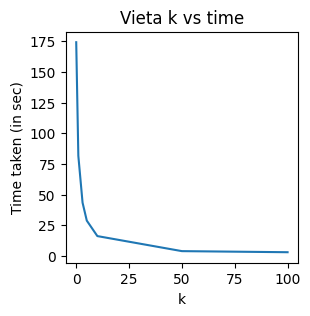

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.plot(K,tt)
plt.title('Vieta k vs time')
plt.ylabel('Time taken (in sec)')
plt.xlabel('k')
plt.show()

Ref: https://www.hpmuseum.org/cgi-sys/cgiwrap/hpmuseum/archv018.cgi?read=144283

## Find Optimal k and n
 
${\displaystyle {\begin{aligned} |\pi - 2V_{(k,n)}| \leq 2C_k 10^{-.6(k+1)n} \end{aligned}}}$

where $C_k$ tends to zero as k increases

The number of accurate $\pi$ digits for any k and n ${\displaystyle {\begin{aligned} \gt -.6(k+1)n - [\log_{10}(C_k)]\end{aligned}}}$

In [12]:
def getAccuracyCount(n,k):
    Ck = ctx.power(10,-1283)*Decimal(2.6)
    ln = ctx.log10(Ck)
    return round(Decimal(0.6*(k+1)*n)-ln)

In [13]:
getAccuracyCount(102, 60)

5016

In [14]:
def getOptimalK(n, AC):
    Ck = ctx.power(10,-1283)*Decimal(2.6)
    return round(Decimal((AC + ctx.log10(Ck))/Decimal(0.6*n))+1)

In [15]:
# lets find optimal k's for calcuating pi upto 5000 terms
N=[8334, 4166, 2081, 1385, 750, 134, 100, 50, 27, 1]
K=[]
for n in N:
    k = getOptimalK(n,5000)
    print('For, n = {} --> k ~ {}'.format(n, k))
    #K.append(k)

For, n = 8334 --> k ~ 2
For, n = 4166 --> k ~ 2
For, n = 2081 --> k ~ 4
For, n = 1385 --> k ~ 5
For, n = 750 --> k ~ 9
For, n = 134 --> k ~ 47
For, n = 100 --> k ~ 63
For, n = 50 --> k ~ 125
For, n = 27 --> k ~ 230
For, n = 1 --> k ~ 6197
